In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## Import data set

In [9]:
train_raw = pd.read_csv('data/train.csv')
test_raw = pd.read_csv('data/test.csv')

In [10]:
train = pd.read_pickle('dump/train.pkl')
test = pd.read_pickle('dump/test.pkl')
response_variable = pd.read_pickle('dump/y_train.pkl')

## Train Test Split

In [11]:
X_train = train
X_test = test
y_train = response_variable

## Modeling

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=5000)

alphas = np.logspace(-4, -2, 100) # [.0004]

grid = GridSearchCV(estimator=lasso,
    param_grid=dict(alpha=alphas), cv=10, scoring='r2')

grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=5000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.0004]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [23]:
y_hats = grid.best_estimator_.predict(X_train)
test_predictions = np.expm1(grid.best_estimator_.predict(X_test))

In [24]:
grid.best_estimator_.score(X_train, y_train)

0.939990990263835

In [29]:
mean_squared_error(y_train, y_hats)

0.00946831027835337

## Prediciton

Text(0.5,1,'Model prediction vs Actual Sale price')

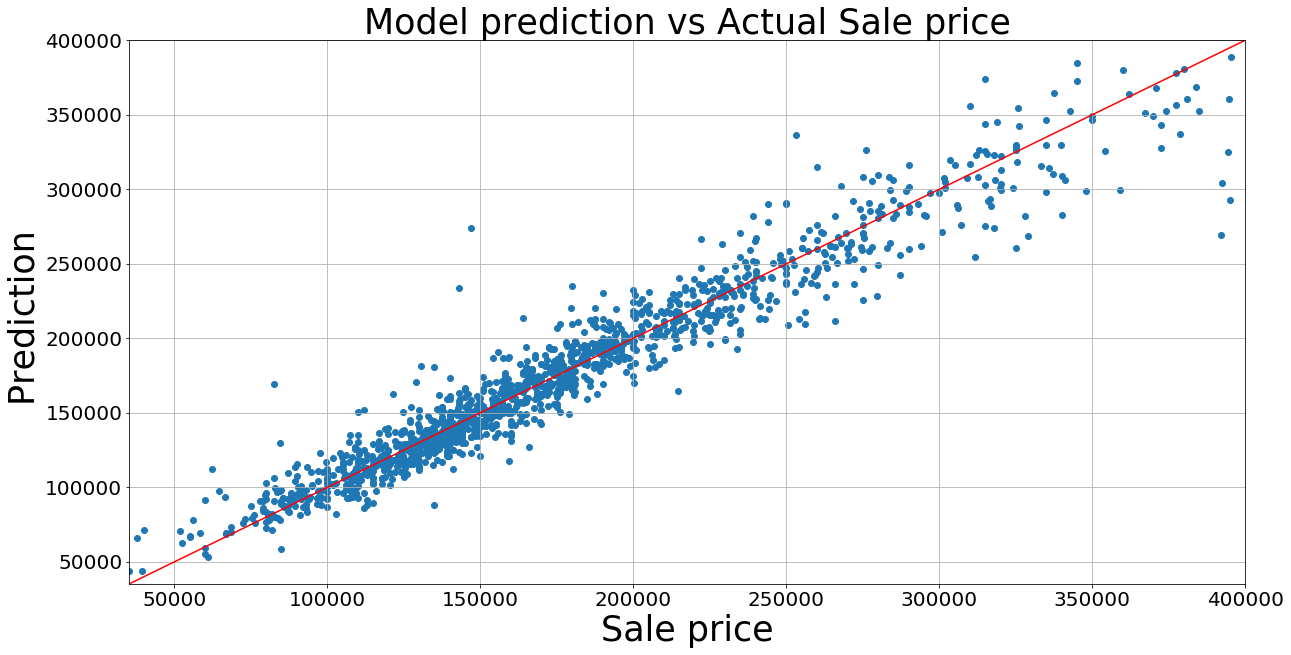

In [10]:
true_line = np.linspace(0, np.expm1(y_train.max()), 50)
predictios = pd.DataFrame({'y_hat': np.expm1(y_hats), 'y': np.expm1(y_train)})


ylabel = '$y_{train}$'
xlabel = r'$\hat{f}(\mathbf{X}_{train})$' 

plt.figure(figsize=(20,10))
plt.scatter(x=predictios.y, y=predictios.y_hat)
line = plt.plot(true_line,
    true_line,  c='red')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.ylim((predictios.y.min(),400000))
plt.xlim((predictios.y.min(),400000))
plt.xlabel('Sale price', fontsize=35)
plt.ylabel('Prediction ', fontsize=35)
plt.title('Model prediction vs Actual Sale price',fontsize=35)

In [842]:
coef_df = pd.DataFrame({'cols': X_train.columns,'coef': grid.best_estimator_.coef_}, index=X_train.columns )

In [1006]:
pd.DataFrame({'Id': test_raw['Id'], 'SalePrice': test_predictions}).to_csv('predictions.csv', index=False)

In [ ]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f predictions.csv -m "Message"